2021-04-24 23:41:45.898 WARNING root: 
  command:

    streamlit run ipykernel_launcher [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None)

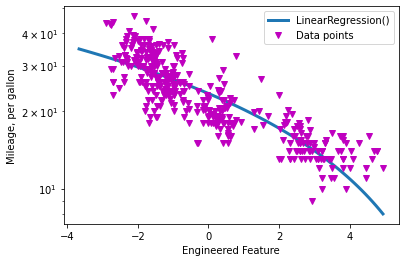

In [11]:
import streamlit as st
# from compute2d import compute_2d_histogram
import numpy as np
import pandas as pd
import altair as at
from copy import copy
import plotly.graph_objects as go
# from paracoords import create_paracoords
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import plotly
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
# preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor


#pipelines
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

# import pickle5 as pickle
import itertools
from joblib import dump,load

#set configurations and title
st.set_page_config(page_title="Auto MPG Explorer",
    page_icon=":car:",
    layout='wide')

st.title('Auto MPG Dataset Interactive Predictive Analytics Module')
st.write("This interactive webapp allows you to explore and visualize how 3 differently trained machine learning models try to predict the mileage of a car, given various numerical attributes about it, including: cylinders, displacement, horsepower, weight, and acceleration. The models used in creating the second visualization can be interactively customized by changing their parameters in the first visualization.")

#load data
auto_mpg = pd.read_csv('auto-mpg.data',sep="\t",header=None)
features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
numeric_columns = ['cylinders','displacement','horsepower','weight','acceleration']
skip_columns = ['model_year','origin'] 
label = ['mpg']
split_data = [elem.split() for elem in auto_mpg[0]] 
for elem in split_data:
    for e in  elem:
        if e == '?':
            e = np.nan
df = pd.DataFrame([[0,0,0,0,0,0,0,0]],columns=features)
for elem in split_data:
    df = df.append(pd.DataFrame([[float(e) if e!='?' else np.nan for e in elem]],columns=features))

df = df.dropna()
# df,_ = train_test_split(df,train_size=0.05)

X = df[numeric_columns]
y = df[label]


def get_mlp_model(x=X.values,y=y.values.ravel(),mlp_alpha=0.1,mlp_activation='relu'):
    return Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', MLPRegressor(hidden_layer_sizes=(100,50,10,),alpha=mlp_alpha,activation=mlp_activation_slider))]).fit(x,y)

def get_svr_model(x=X.values,y=y.values.ravel(),svr_kernel='linear',svr_c=0.1):
    return Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', LinearSVR(C=svr_c))]).fit(x,y)

def get_linear_model(x=X.values,y=y.values.ravel()):
    return Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', LinearRegression())]).fit(x,y)

def get_rf_model(x=X.values,y=y.values.ravel(),rf_n_estimators=100):
    return Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', RandomForestRegressor(n_estimators=rf_n_estimators) )]).fit(x,y)

# def get_candidate_models(x=X.values,y=y.values.ravel(),mlp_alpha=0.3,mlp_activation='relu',svr_kernel='linear',svr_c=0.1):
    
#     # mlp_pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', MLPRegressor(epsilon=1e-7,hidden_layer_sizes=(100,50,10),alpha=mlp_alpha,activation=mlp_activation))]).fit(x,y)
#     # svr_pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', SVR(kernel=svr_kernel,C=svr_c,max_iter=200))]).fit(x,y)
#     linear_pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=1)), ('regressor', LinearRegression())]).fit(x,y)
#     regressors = {
#         # 'MLP':mlp_pipe,
#             #   'SVR': svr_pipe ,
#                'Linear': linear_pipe
#              }
#     return regressors

def regression_plot(x=X.values,y=y.values,xlabel='Engineered Feature',ylabel='Mileage, per gallon',logy=False,regressors=None):
    '''creates a scatter plot of all passed samples along with predictions of of all passed regressors'''

    fig, ax = plt.subplots()    
    # x_pca = None   
    # if regressors is not None:
        # for regressor in regressors.items():
        #regressor = regressor[1].fit(x.reshape(-1,1),y)
    x_std = regressors.named_steps['scaler'].transform(x)
    x_pca = regressors.named_steps['pca'].transform(x_std)
    max_x = np.max(x_pca)
    min_x = np.min(x_pca)
    ax.plot(np.arange(float(min_x),float(max_x),0.1), regressors.named_steps['regressor'].predict(np.array(np.arange(float(min_x),float(max_x),0.1)).reshape(-1,1)) ,label=regressors.named_steps['regressor'],linewidth=3)

    ax.plot(x_pca,y, linewidth=0, marker='v', label='Data points',color='m')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if logy:
        ax.set_yscale('log')
    ax.legend(facecolor='white')

    return fig

#create 2d correlation
# value_columns_white = copy(white)
# white2d_bins = pd.concat([compute_2d_histogram(var1, var2, white) for var1 in value_columns_white for var2 in value_columns_white])

# value_columns_red = copy(red)
# red2d_bins = pd.concat([compute_2d_histogram(var1, var2, white) for var1 in value_columns_red for var2 in value_columns_red])

#create selectors
# st.write("Choose your Parameters:")

model_selection_slider = st.sidebar.select_slider('Model Type',['MLP','Linear','RF'],'Linear')

log_scaling_slider = st.sidebar.radio('Y-Axis Log Scale',[True,False],False)

mlp_alpha_slider = st.sidebar.select_slider('MLP Regularization',[elem for elem in np.arange(0,0.5,0.01)],0.3)


mlp_activation_slider = st.sidebar.select_slider('MLP Activation Function',['identity','logistic','tanh','relu'],'relu')

rf_n_estimator_slider = st.sidebar.select_slider('RF No of Estimators',[100,200,500],100)
# mlp_hidden_layer_size_text = st.text_input("MLP Hidden Layer Size", (100,))

# regressors = get_candidate_models(x=X.values,y=y.values.ravel(),mlp_alpha=mlp_alpha_slider,mlp_activation=mlp_activation_slider,svr_kernel=svr_kernel_slider,svr_c=svr_c_slider)
# "The dataset contains attributes about each car and a mileage per gallon value. The plot below shows how three different models fit the given data. Play around with the sliders to see how performance and error scores of the models is affected by different combinations of model building parameters."

if model_selection_slider == 'MLP':
    regressor = get_mlp_model(x=X.values,y=y.values.ravel(),mlp_alpha=mlp_alpha_slider,mlp_activation=mlp_activation_slider)
    fig = regression_plot(x=X.values,y=y.values,logy=log_scaling_slider,regressors=regressor)
    st.write(fig)
if model_selection_slider == 'Linear':
    regressor = get_linear_model(x=X.values,y=y.values.ravel())
    fig = regression_plot(x=X.values,y=y.values,logy=log_scaling_slider,regressors=regressor)
    st.write(fig)
if model_selection_slider == 'RF':
    regressor = get_rf_model(x=X.values,y=y.values.ravel(),rf_n_estimators=rf_n_estimator_slider)
    fig = regression_plot(x=X.values,y=y.values,logy=log_scaling_slider,regressors=regressor)
    st.write(fig)


# st.plotly_chart(fig, use_container_width=True)

st.markdown("*-Created by Sumeet Zankar*")

In [12]:
def regression_plot(x=X.values,y=y.values,xlabel='First PCA Feature',ylabel='Second PCA Feature',zlabel='Mileage per Gallon',logy=False,regressors=None):
    '''creates a scatter plot of all passed samples along with predictions of of all passed regressors'''

    # fig, ax = plt.subplots()    
    # x_pca = None   
    # if regressors is not None:
        # for regressor in regressors.items():
        #regressor = regressor[1].fit(x.reshape(-1,1),y)
    x_std = regressors.named_steps['scaler'].transform(x)
    x_pca = regressors.named_steps['pca'].transform(x_std)
    max_x_1 = np.max(np.array([elem[0] for elem in x_pca]))
    min_x_1 = np.min(np.array([elem[0] for elem in x_pca]))
    max_x_2 = np.max(np.array([elem[1] for elem in x_pca]))
    min_x_2 = np.min(np.array([elem[1] for elem in x_pca]))

    a,b = np.meshgrid(np.arange(float(min_x_1),float(max_x_1)),np.arange(float(min_x_2),float(max_x_2)))

    positions = np.vstack([a.ravel(),b.ravel()])

    x_test = (np.array(positions)).T

    y_pred_test = regressors.named_steps['regressor'].predict(x_test).reshape(a.shape)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    cset = ax.plot_surface(a,b,y_pred_test,cmap=cm.coolwarm)
    ax.clabel(cset,fontsize=9,inline=1)
    # 

    ax.scatter([elem[0] for elem in x_pca],[elem[1] for elem in x_pca],y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    if logy:
        ax.set_zscale('log')
    ax.legend(facecolor='white')

    return fig

def interactive_regression_plot(x=X.values,y=y.values,xlabel='First PCA Feature',ylabel='Second PCA Feature',zlabel='Mileage per Gallon',logy=False,regressors=None):
    '''creates a scatter plot of all passed samples along with predictions of of all passed regressors'''

    # fig, ax = plt.subplots()    
    # x_pca = None   
    # if regressors is not None:
        # for regressor in regressors.items():
        #regressor = regressor[1].fit(x.reshape(-1,1),y)
    x_std = regressors.named_steps['scaler'].transform(x)
    x_pca = regressors.named_steps['pca'].transform(x_std)
    max_x_1 = np.max(np.array([elem[0] for elem in x_pca]))
    min_x_1 = np.min(np.array([elem[0] for elem in x_pca]))
    max_x_2 = np.max(np.array([elem[1] for elem in x_pca]))
    min_x_2 = np.min(np.array([elem[1] for elem in x_pca]))

    a,b = np.meshgrid(np.arange(float(min_x_1),float(max_x_1)),np.arange(float(min_x_2),float(max_x_2)))

    positions = np.vstack([a.ravel(),b.ravel()])

    x_test = (np.array(positions)).T

    y_pred_test = regressors.named_steps['regressor'].predict(x_test).reshape(a.shape)

    plotly.offline.init_notebook_mode()

    trace1 = go.Scatter3d(
    x=[elem[0] for elem in x_pca],
    y=[elem[1] for elem in x_pca],
    z=y,
    mode='markers')

    trace2 = go.Surface(x=a, y=b, z=y_pred_test, colorscale='RdBu', showscale=False)
    # Configure the layout.
#     layout = go.Layout(
#     margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
# )
    plot_figure =  go.Figure(data=[trace2,trace1])
    
    plotly.offline.iplot(plot_figure)

    # return plot_figure

    
#load data
auto_mpg = pd.read_csv('auto-mpg.data',sep="\t",header=None)
features = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
numeric_columns = ['cylinders','displacement','horsepower','weight','acceleration']
skip_columns = ['model_year','origin'] 
label = ['mpg']
split_data = [elem.split() for elem in auto_mpg[0]] 
for elem in split_data:
    for e in  elem:
        if e == '?':
            e = np.nan
df = pd.DataFrame([[0,0,0,0,0,0,0,0]],columns=features)
for elem in split_data:
    df = df.append(pd.DataFrame([[float(e) if e!='?' else np.nan for e in elem]],columns=features))

df = df.dropna()
# df,_ = train_test_split(df,train_size=0.05)

X = df[numeric_columns]
y = df[label]


def get_mlp_model(x=X.values,y=y.values.ravel(),mlp_alpha=0.1,mlp_activation='relu'):
    return Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=2)), ('regressor', MLPRegressor(hidden_layer_sizes=(100,50,10,),alpha=mlp_alpha,activation=mlp_activation_slider))]).fit(x,y)

mlp = get_mlp_model(x=X.values,y=y.values.ravel(),)






C:\Users\ZankarSS\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
regression_plot(x=X.values,y=y.values,xlabel='First PCA Feature',ylabel='Second PCA Feature',zlabel='Mileage per Gallon',logy=False,regressors=mlp)

NameError: name 'regression_plot' is not defined

In [3]:
interactive_regression_plot(x=X.values,y=y.values,xlabel='First PCA Feature',ylabel='Second PCA Feature',zlabel='Mileage per Gallon',logy=False,regressors=mlp)

NameError: name 'interactive_regression_plot' is not defined

In [7]:
def compute_2d_histogram(var1, var2, df, density=True):
    H, xedges, yedges = np.histogram2d(df[var1], df[var2], density=density)
    H[H == 0] = np.nan

    # Create a nice variable that shows the bin boundaries
    xedges = pd.Series(['{0:.4g}'.format(num) for num in xedges])
    xedges = pd.DataFrame({"a": xedges.shift(), "b": xedges}).dropna().agg(' - '.join, axis=1)
    yedges = pd.Series(['{0:.4g}'.format(num) for num in yedges])
    yedges = pd.DataFrame({"a": yedges.shift(), "b": yedges}).dropna().agg(' - '.join, axis=1)

    # Cast to long format using melt
    res = pd.DataFrame(H, 
                       index=yedges, 
                       columns=xedges).reset_index().melt(
                            id_vars='index'
                       ).rename(columns={'index': 'value2', 
                                         'value': 'correlation',
                                         'variable': 'value'})
    

    # Also add the raw left boundary of the bin as a column, will be used to sort the axis labels later
    res['raw_left_value'] = res['value'].str.split(' - ').map(lambda x: x[0]).astype(float)   
    res['raw_left_value2'] = res['value2'].str.split(' - ').map(lambda x: x[0]).astype(float) 
    res['variable'] = var1
    res['variable2'] = var2 
    return res.dropna() # Drop all combinations for which no values where found"

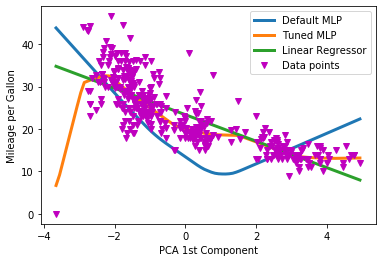

In [124]:
regression_plot(X.values,y.values,regressors=regressors,xlabel='PCA 1st Component',ylabel='Mileage per Gallon')